## Introduction

The power behind statistical techniques and metrics like standard deviation, z-scores, confidence intervals, probability estimation, and hypothesis testing begins by getting data for analysis. Once you've structured and measured your data, you can move on to visualizing large amounts of data and finding patterns.

Here are a couple of takeaways you can expect by the end of this lesson:

- How population and samples work
- Various sampling methods you can use

Here is the workflow we'll begin working with in this lesson.

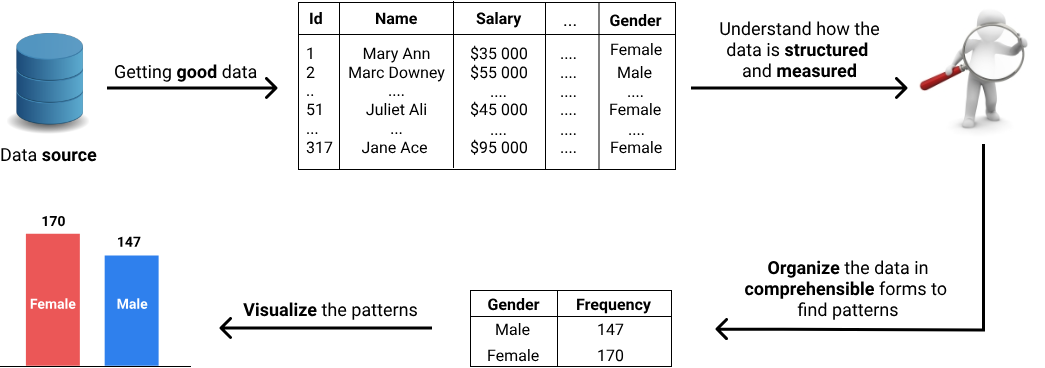

In this first lesson, our focus will be on the details around getting data for analysis. We'll work with a real-world dataset, so let's begin by exploring the kinds of problems we can solve with statistics.

## Solving Problems with Statistics

Imagine you're managing a small tech company with seven employees. At the end of the year, you gather some data about your employees to better understand the state of your company. The data you collected is straightforward, and you can quickly make a few conclusions just by using a bit of arithmetic and logic.

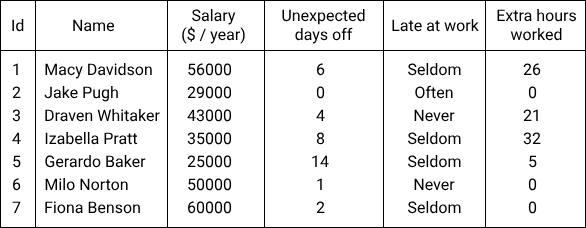

But years have gone by, and your business has grown into a successful company with 231 employees. You still want to get insights from data, but now you have so much that analyzing it has become difficult and inconvenient. As your company continues to grow, the techniques you used to analyze data start to become impractical.

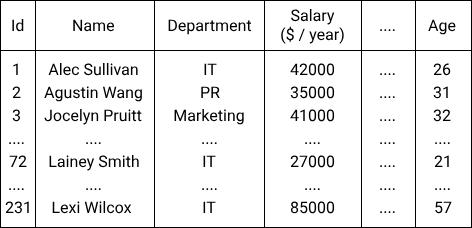

This is an example of a problem we can solve with statistics. Using statistical techniques, we can organize, summarize, and visualize large amounts of data to find patterns that otherwise would remain hidden.

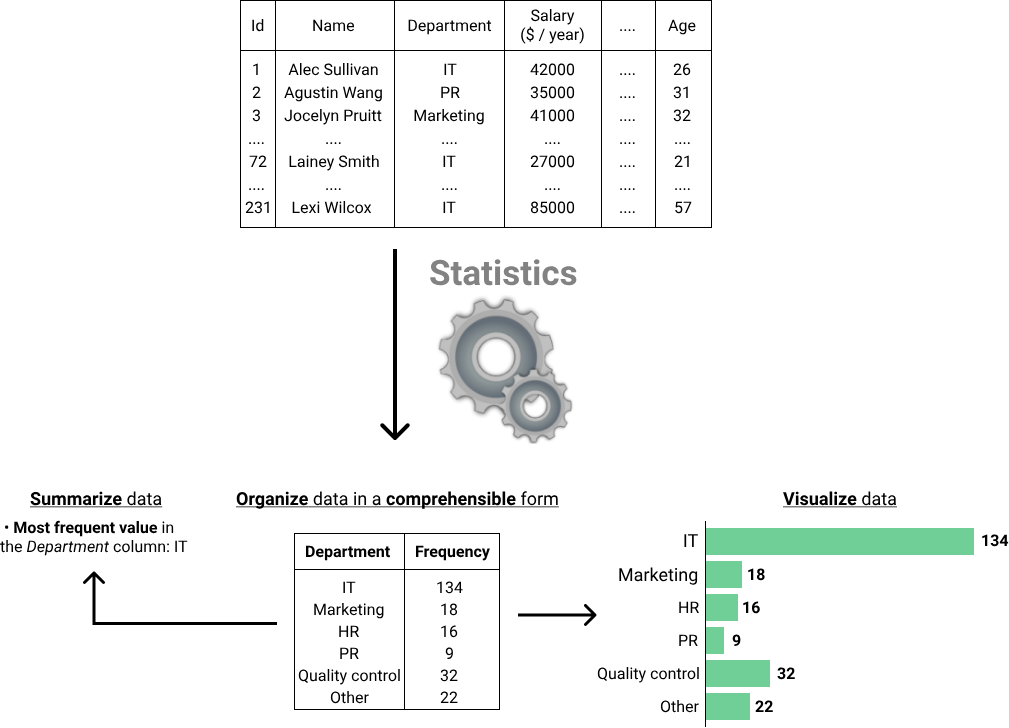

More years have gone by, and now you run an international company with over 50,000 employees. You've recently made a company-wide change that made your employees' jobs more difficult. Now you want to determine if this change has affected the employees negatively in any significant manner. If it has, then the change may backfire in the future, so it would be a good decision to revert the change while it's still possible.

In this situation, you reach out to your data analyst and ask for her opinion. She says that she can do a survey to collect data and answer your question. Surveying over 50,000 employees would be time-consuming and expensive, so she plans to survey 100 people to get an answer to your question.

One week later, the analysis shows that people generally report they are less satisfied with their jobs, compared to the previous year (before the change). The inability to balance work and personal life is the main reported cause of dissatisfaction. Your analyst also tells you that the decrease in satisfaction is significant, meaning that it's very unlikely to simply have happened by chance.

Something must have caused the decrease, and that something is probably the major change you've recently made.

This sort of scenario is very common in practice. As a data analyst, you'll often need to use a small dataset to answer questions about a much larger dataset.

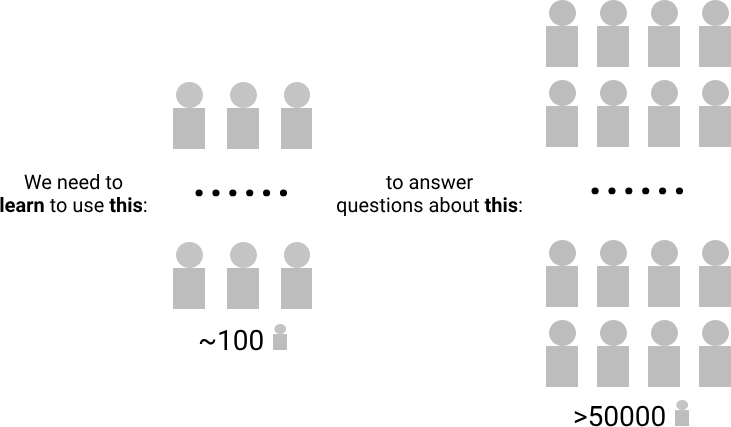

Now, we'll begin exploring the details of collecting data, which is what the data analyst in our story did when she surveyed the employees.

## Populations and Samples

The data analyst in our previous example tried to determine if people in the company are less satisfied at work than they were the year before. Her question was about everyone working for the company. However, she only selected a small group to answer the question.

In statistics, we call the set of all individuals relevant to a particular statistical question a population. For our analyst's question, everyone at the company was relevant. So, the population in this case consisted of everyone at the company.

We call a smaller group selected from a population a sample. When we select a smaller group from a population we're sampling. In our example, the data analyst took a sample of 100 people from a population of over 50,000 people.

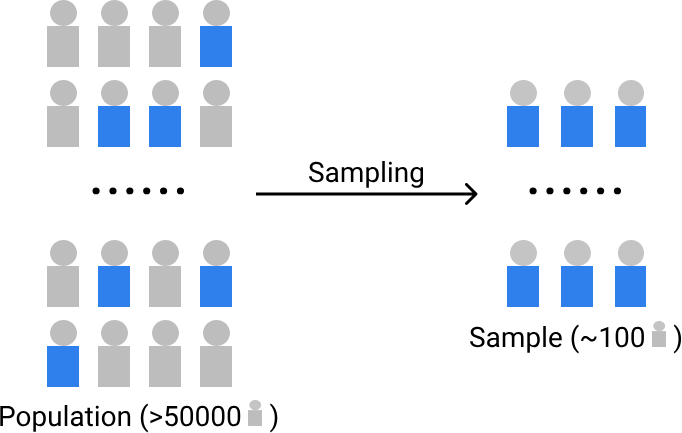

Whether a dataset is a sample or a population depends on the question we're trying to answer. For our analyst's question, the population consisted of everyone at the company. However, if we change the question, the same group of individuals can become a sample.

For instance, if we tried to determine if people at international companies are satisfied at work, then our company of over 50,000 employees would be just one sample in a much larger population. The population would consist of all employees working at all international companies. Our company's employees alone would not be representative of this larger population.

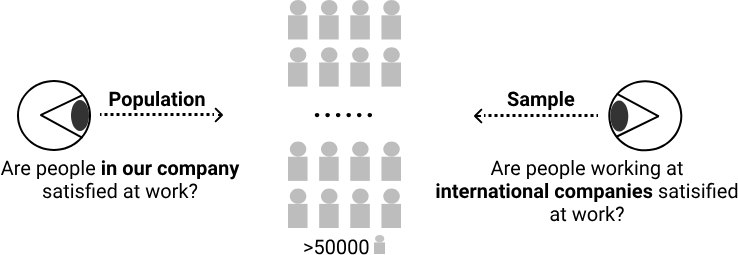

Populations don't necessarily consist of people. Behavioral scientists, for instance, often try to answer questions about populations of monkeys, rats, or other lab animals. Similarly, other people try to answer questions about countries, companies, vegetables, soils, factory-produced equipment, etc.

The individual elements of a population or a sample go by many names. You'll often see the elements of a population referred to as individuals, units, events, and observations. These are all interchangeable, and they refer to the same thing: the individual parts of a population. When we use the term "population individuals," we don't necessarily mean "people." "Individuals" can refer to people, needles, frogs, stars, etc.

In the case of a sample, you'll often see the following terminology used interchangeably: sample unit, sample point, sample individual, or sample observation.

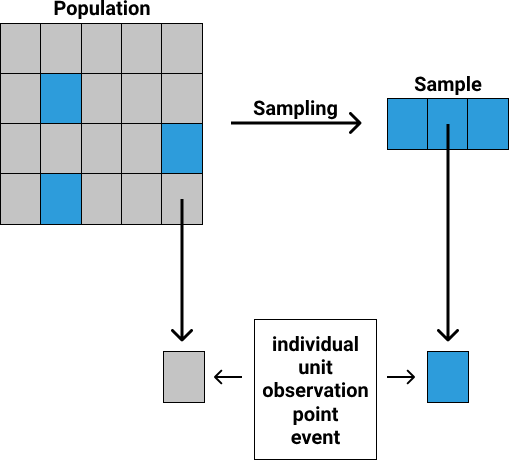

It's important to note that when sampling, statisticians often refer to the [Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem), which recommends a minimum sample size of 30. This applies even in stratified sampling. With a sample size of at least 30, the sample mean is generally closer to the population mean. For example:

In [1]:
# sample_mean_1 = wnba.PTS.sample(30).mean()
# sample_mean_2 = wnba.PTS.sample(50).mean()
# sample_mean_3 = wnba.PTS.sample(75).mean()

These larger sample sizes help ensure that our samples are more representative of their corresponding populations.

## Sampling Error

For every statistical question we want to answer, we should try to use the population. In practice, that's not always possible because the populations of interest usually vary from large to extremely large. Also, getting data is generally not an easy task, so small populations often pose problems too.

We can solve these problems by sampling from the population that interests us. Although it's not as good as working with the entire population, working with a sample is the next best thing.

When we sample, the data we get might be more or less similar to the data in the population. For instance, let's say we know that the average salary in our company is $34,500, and the proportion of women is 60 percent. We take two samples and find these results:

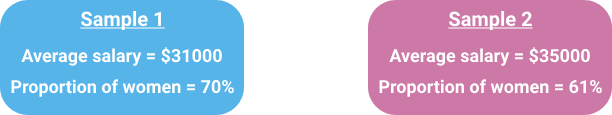

As you can see, the metrics of the two samples are different than the metrics of the population. A sample is, by definition, an incomplete dataset for the question we're trying to answer. For this reason, there's almost always some difference between the metrics of a population and the metrics of a sample. We can see this difference as an error, and because it's the result of sampling, we call it sampling error.

We call a metric specific to a population a parameter, and we call one specific to a sample a statistic. In our example above, the average salary of all the employees is a parameter because it's a metric that describes the entire population. The average salaries from our two samples are examples of statistics because they only describe the samples.

Another way to think of the concept of the sampling error is as the difference between a parameter and a statistic:

sampling error = parameter − statistic

At this point in the lesson, we'll move from the tech company example to working with a real-world dataset. Our first challenge will be to measure sampling error using this dataset.

The dataset is about basketball players in the WNBA (Women's National Basketball Association), and contains general information about players, along with their metrics for the 2016-2017 season. Thomas De Jonghe assembled this dataset, and you can download it from [Kaggle](https://www.kaggle.com/datasets/jinxbe/wnba-player-stats-2017) (where you can also find useful documentation for the dataset).

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
wnba = pd.read_csv('../../Datasets/wnba.csv')
wnba.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,...,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,...,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,...,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,...,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,...,3,9,12,12,7,0,14,50,0,0


In [6]:
wnba.shape

(143, 32)

In [16]:
parameter = wnba['Games Played'].max()
parameter

32

In [19]:
statistic = wnba.sample(n=30, random_state=1)['Games Played'].max()
statistic

30

In [18]:
sampling_error = parameter - statistic
sampling_error

2

## Simple Random Sampling

When we sample, we want to minimize the sampling error as much as we can. We want our sample to represent the population as accurately as possible.

If we sampled to measure the mean height of adults in the U.S., we'd like our sample statistic (sample mean height) to get as close as possible to the population's parameter (population mean height). For this to happen, we need the individuals in our sample to form a group that is similar in structure with the group forming the population.

The U.S. adult population is diverse, comprised of people of various heights. If we sampled 100 individuals from various basketball teams, then we'd almost certainly get a sample with a structure that is significantly different than the population. As a consequence, we should expect a large sampling error (a large discrepancy between our sample's statistic (sample mean height) and the population's parameter (population mean height)).

In statistical terms, we want our samples to be representative of their corresponding populations. If a sample is representative, then the sampling error is low. The more representative a sample is, the smaller the sampling error. The less representative a sample is, the greater the sampling error.

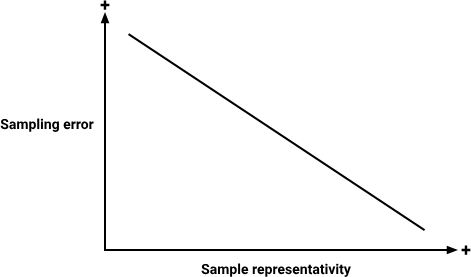

To make our samples representative, we can try to give every individual in the population an equal chance for selection in our samples. We want a very tall individual to have the same chance of being selected as a short individual. To give every individual an equal chance at selection, we need to sample randomly.

One way to perform random sampling is to generate random numbers and use them to select a few sample units from the population. In statistics, this sampling method is called simple random sampling, often abbreviated as SRS.

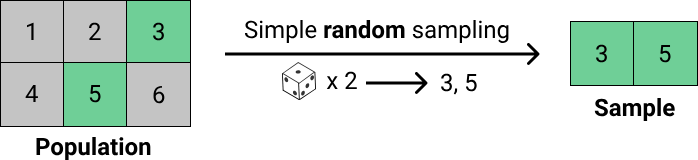

In our previous exercise, we used Series.sample() to sample. This method performs simple random sampling by generating an array of random numbers, and then using those numbers to select values from a Series at the indices corresponding to those random numbers. We can also extend this method for DataFrame [objects](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html), where we can sample random rows or columns.

When we use the random_state parameter, like we did in the previous exercise with Series.sample(30, random_state = 1), we make the generation of random numbers predictable. This is because Series.sample() uses a pseudorandom number generator. A [pseudorandom number generator](https://en.wikipedia.org/wiki/Pseudorandom_number_generator) uses an initial value to generate a sequence of numbers that has properties similar to those of a sequence that is truly random. With random_state, we specify that initial value used by the pseudorandom number generator.

If we want to generate a sequence of five numbers using a pseudorandom generator, and begin from an initial value of 1, we'll get the same five numbers no matter how many times we run the code. If we ran wnba['Games Played'].sample(5, random_state = 1) we'd get the same sample every time we ran the code.

Pseudorandom number generators are useful in scientific research where [reproducible work](https://en.wikipedia.org/wiki/Reproducibility) is necessary.

In [21]:
mylist = []
for i in range(100):
    sample = wnba['PTS'].sample(n=10, random_state=i)
    mean_sample = sample.mean()
    mylist.append(mean_sample)

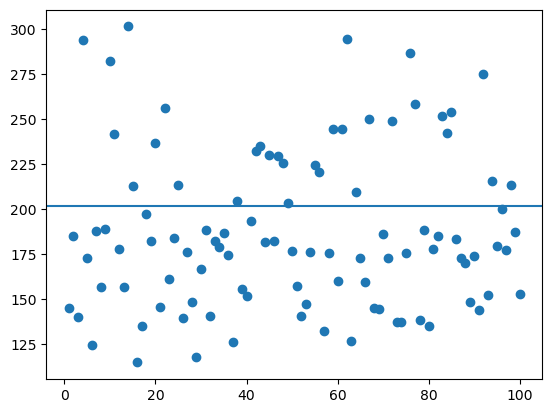

In [25]:
plt.scatter(x=np.linspace(1, 100, 100), y=mylist)
plt.axhline(y=wnba['PTS'].mean())
plt.show()

## The Importance of Sample Size

On the scatter plot from the previous screen, we can see that the sample means vary a lot around the population mean. With a minimum sample mean of 115 points, a maximum of 301.4, and a population mean of roughly 201.8, we can tell that the sampling error is quite large for some of the cases.



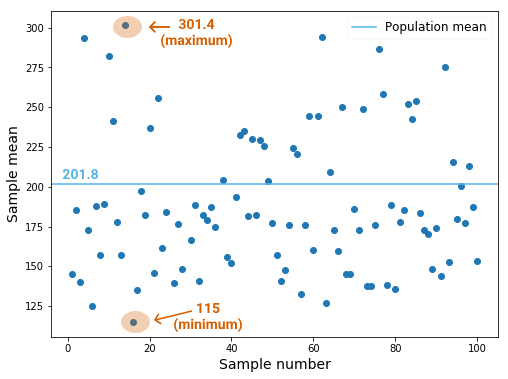

Because sample means vary a lot around the population mean, there's a good chance we get a sample that isn't representative of the population:

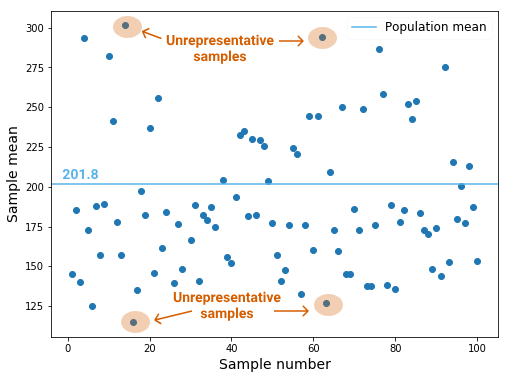

We can solve this problem by increasing the sample size. As we increase the sample size, the sample means vary less around the population mean, and the chances of getting an unrepresentative sample decrease.

In the previous exercise, we took 100 samples, and each had a sample size of 10 units. Here is what happens when we repeat the procedure but increase the size of the samples:

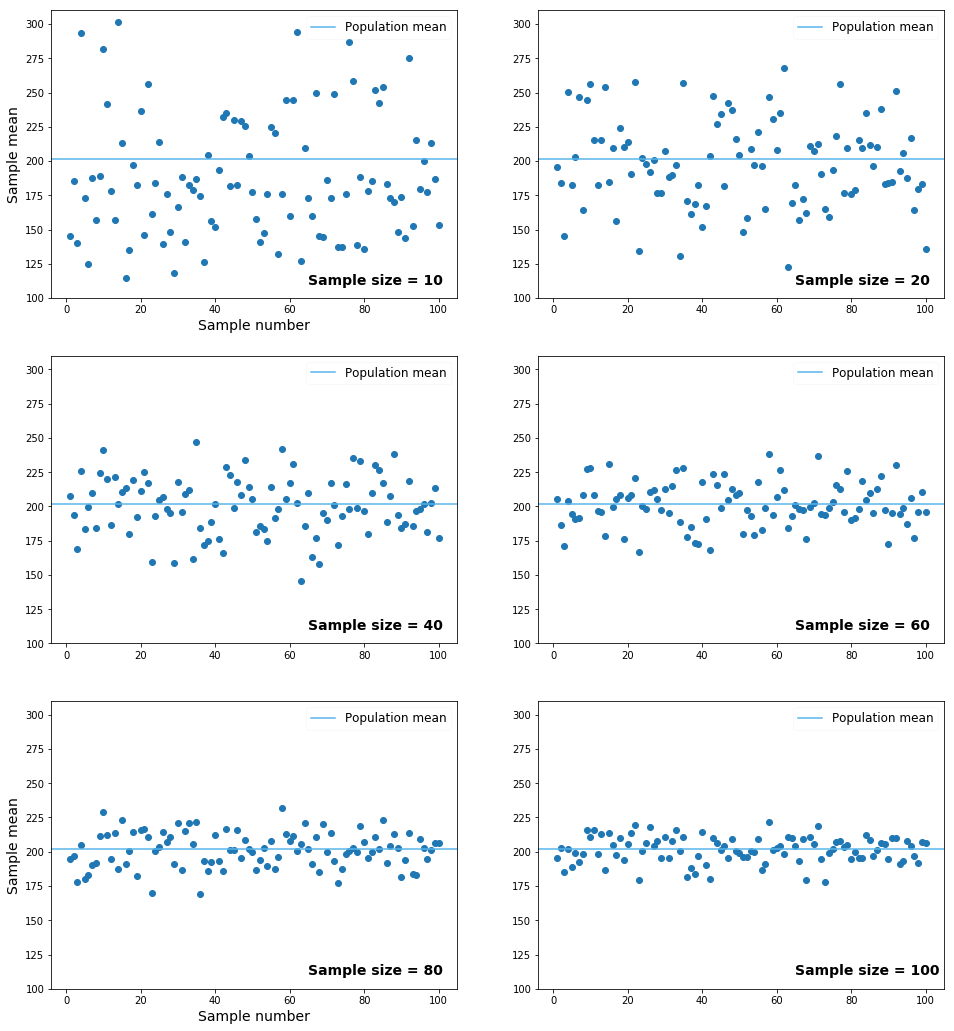

We can see how sample means tend to vary less around the population mean as we increase the sample size. From this observation we can make two conclusions:

- Simple random sampling isn't a reliable sampling method when the sample size is small. Because sample means vary a lot around the population mean, there's a good chance we'll get an unrepresentative sample.

- When we do simple random sampling, we should try to get a sample that is as large as possible. A large sample decreases the variability of the sampling process, which, in turn, decreases the chances that we'll get an unrepresentative sample.

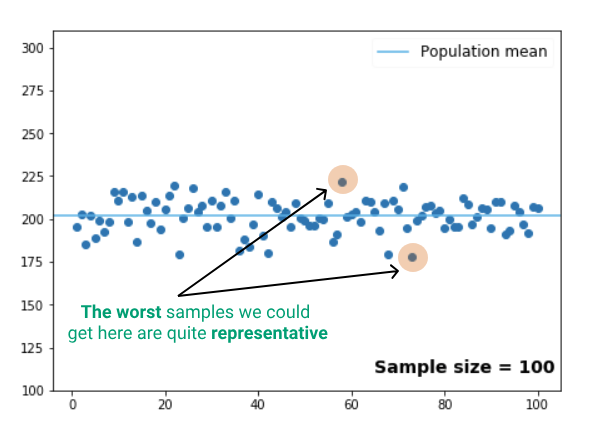

## Stratified Sampling

Because simple random sampling is entirely random, it can exclude certain population individuals who are relevant to some of our questions.

For example, players in basketball play in different positions on the court. The metrics of a player (number of points, number of assists, etc.) depend on their position, and we might want to analyze the patterns for each individual position. If we perform simple random sampling, there's a chance that our sample won't include some categories. In other words, it's not guaranteed that we'll have a representative sample that has observations for every position we want to analyze.

There are five unique positions in our data set:

In [27]:
wnba['Pos'].unique()

array(['F', 'G/F', 'G', 'C', 'F/C'], dtype=object)

Let's quickly decipher each abbreviation:

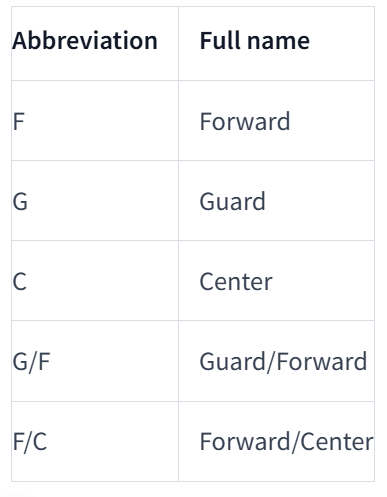

The downside of simple random sampling is that it can exclude individuals playing a certain position. Visually, and on a smaller scale, this is what could happen:

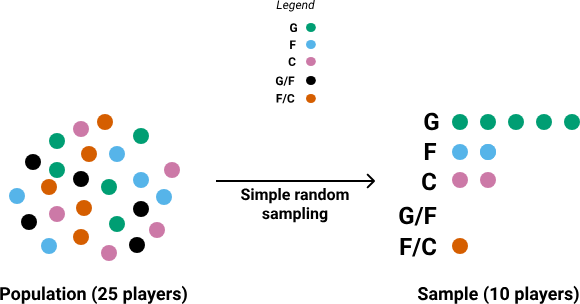

To ensure we end up with a sample that has observations for all the categories of interest, we can change the sampling method. We can organize our data set into different groups and then do simple random sampling for every group. We can group our data set by player position, and then sample randomly from each group.

Visually, and on a smaller scale, we need to do this:

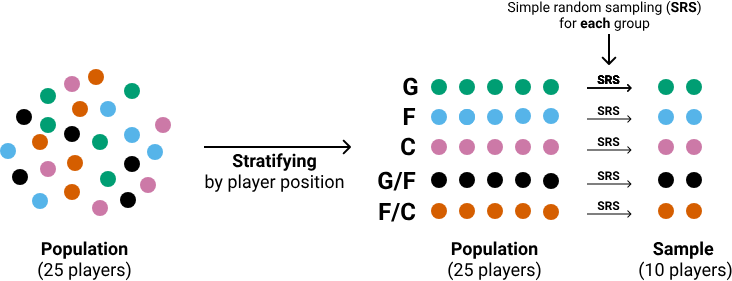

We call this sampling method stratified sampling, and we call each stratified group a stratum.

Perform stratified sampling: stratify the dataset by player position, and then do simple random sampling on every stratum. At the end, use the sample to determine which position scores the highest number of points per game.

In [33]:
wnba['PTS per Games Played'] = wnba['PTS'] / wnba['Games Played']

positions = wnba['Pos'].unique()

In [43]:
mydict = {}

for pos in positions:
    strata = wnba[wnba['Pos'] == pos]
    sample = strata.sample(n=10, random_state=0)
    mean_sample = sample['PTS per Games Played'].mean()
    mydict[pos] = mean_sample

In [44]:
mydict

{'F': 8.702175158545568,
 'G/F': 6.817264935760487,
 'G': 7.092926195632343,
 'C': 9.833761394334251,
 'F/C': 9.059118773946361}

In [46]:
position_most_points = max(mydict, key=mydict.get)
position_most_points

'C'

In [47]:
mydict[position_most_points]

9.833761394334251

##  Proportional Stratified Sampling

Earlier in this lesson, we performed simple random sampling 100 times on the original dataset, and for each sample, we computed the mean number of total points a player scores in a season. The problem is that the number of games played, which ranges from 2 to 32, influences the number of total points:

In [49]:
wnba['Games Played'].min()

2

In [50]:
wnba['Games Played'].max()

32

Approximately 72.7 percent of the players had more than 23 games for the 2016-2017 season, which means that this category of players who played many games probably influenced the mean. Let's take a look at the other percentages:

In [51]:
wnba['Games Played'].value_counts(bins=3, normalize=True) * 100

(22.0, 32.0]     72.727273
(12.0, 22.0]     18.181818
(1.969, 12.0]     9.090909
Name: proportion, dtype: float64

As a side note on the output above, (1.969, 12.0], (12.0, 22.0] and (22.0, 32.0] are number intervals. The ( character indicates that the beginning of the interval isn't included, and the ] indicates that the endpoint is included. For example, (22.0, 32.0] means that 22.0 isn't included, while 32.0 is, and the interval contains this array of numbers: [23, 24, 25, 26, 27, 28, 29, 30, 31, 32].

Getting back to our discussion, when we compute the mean of the total points using the population (the entire dataset), those 72.7 percent of players who played more than 23 games will probably significantly influence the mean. However, when we sample randomly, we can end up with a sample where the proportions are different than in the population.

For instance, we might end up with a sample where only 2 percent of the players played more than 23 games. This will result in a sample mean that underestimates the population mean. Or we could have a sample where more than 95 percent of the players had 23 games in the 2016-2017 season. This will result in overestimating the population mean. This scenario of under- or overestimation is common for small samples.

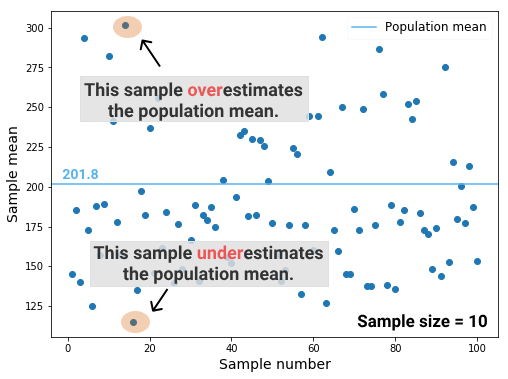

One solution to this problem is to use stratified sampling while being mindful of the proportions in the population. We can stratify our data set by the number of games played, and then sample randomly from each stratum a proportional number of observations.

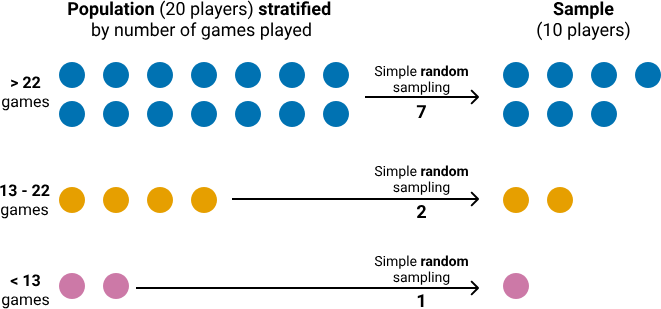

In the diagram above, we can see the following from a population of 20 individuals:

- 14 individuals played more than 22 games.
- 4 individuals played between 13 and 22 games.
- 2 individuals played below 13 games.

Transforming these figures to percentages, 70 percent of the individuals played more than 22 games, 20 percent played between 13 and 22 games, and 10 percent played below 13 games. Because we sampled proportionally, the same percentages (70 percent, 20 percent, 10 percent) are preserved in the sample (even though the absolute values are different): 70 percent played more than 22 games, 20 percent played between 13 and 22 games, and 10 percent played less than 13 games.

In [55]:
first = wnba[wnba['Games Played'] <= 12]
second = wnba[(wnba['Games Played'] > 12) & (wnba['Games Played'] <= 22)]
third = wnba[wnba['Games Played'] > 22]

In [59]:
sample_means = []
for i in range(100):
    sample1 = first.sample(1, random_state=i)
    sample2 = second.sample(2, random_state=i)
    sample3 = third.sample(7, random_state=i)
    sample = pd.concat([sample1, sample2, sample3])
    mean_sample = sample['PTS'].mean()
    sample_means.append(mean_sample)
    

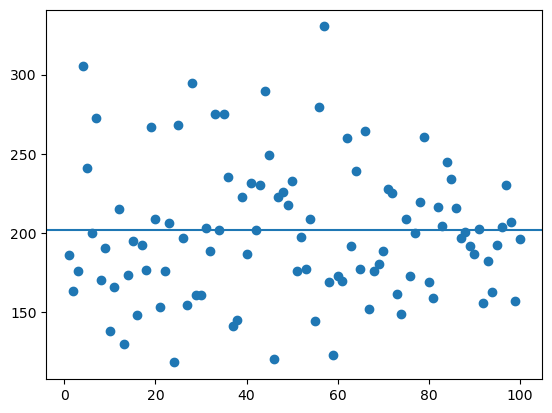

In [60]:
plt.scatter(x=np.linspace(1, 100, 100), y=sample_means)
plt.axhline(y=wnba['PTS'].mean())
plt.show()

In [62]:
pd.cut(wnba['Games Played'], bins=3, labels=['low', 'medium', 'high'])

0         low
1        high
2        high
3        high
4        high
        ...  
138      high
139    medium
140      high
141      high
142      high
Name: Games Played, Length: 143, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']

In [63]:
strata = pd.cut(wnba['Games Played'], bins=3, labels=['low', 'medium', 'high'])
wnba['level'] = strata
means = []

for i in range(100):
    sample_low = wnba[wnba['level'] == 'low'].sample(1, random_state=i)
    sample_medium = wnba[wnba['level'] == 'medium'].sample(2, random_state=i)
    sample_high = wnba[wnba['level'] == 'high'].sample(7, random_state=i)
    sample = pd.concat([sample_low, sample_medium, sample_high])
    sample_mean = sample['PTS'].mean()
    means.append(sample_mean)

## Choosing the Right Strata

You might not have been impressed by the results we got by sampling proportionally. The variability of the sampling was quite large, and many sample means were unrepresentative, being far from the population mean. In fact, this sampling method doesn't seem to perform better than simple random sampling:

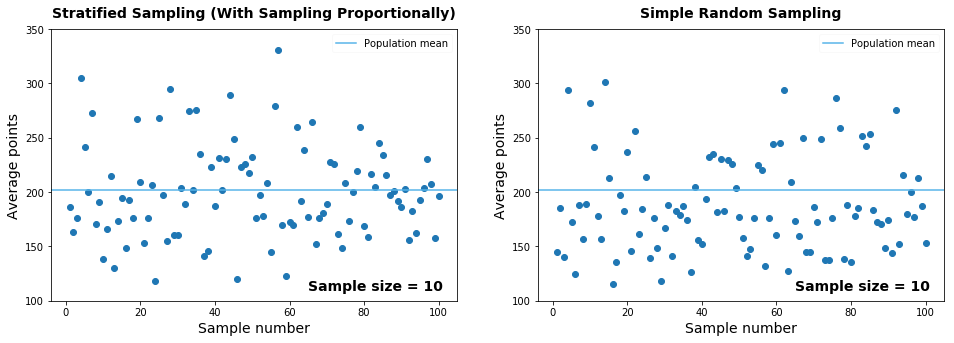

 The poor performance is a result of choosing bad strata. We stratified the data by the number of games played, but this isn't a good approach. A player has technically played one game even if she only played for one or two minutes, even though others play 30 or 40 minutes, and it still only qualifies as one game.

It makes more sense to stratify the data by number of minutes played, rather than by number of games played. The minutes played are a much better indicator of how much a player scored in a season than the number of games played.

Our dataset contains the total number of minutes played by each player for the entire season. If we make strata based on minutes played, and then sample proportionally using stratified sampling, we get something visibly better than simple random sampling (especially in terms of variability):

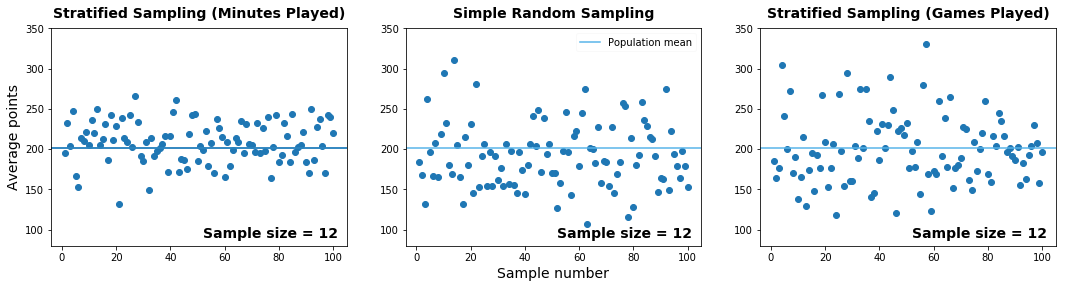

We increased the sample size to 12 so that we can create a better proportional sampling for the strata organized by minutes played.

Here are a few guidelines for choosing good strata:

1. Minimize the variability within each stratum.

For instance, avoid having in the same stratum a player that has scored 10 points and a player that has scored 500. If the variability is high, it might be a sign that you either need more granular stratification (you need more strata), or you need to change the criterion of stratification (an example of criterion is minutes played).

 2. Maximize the variability between strata.

Good strata are different from one another. If you have strata that are similar to one another with respect to what you want to measure, you might need a more granular stratification, or you might need to change the stratification criterion. On the previous screen, stratifying the data by games played resulted in strata that were similar to each other regarding the distribution of the total points. We managed to increase the variability between strata by changing the criterion of stratification to minutes played.

3. The stratification criterion should correlate strongly with the property you're trying to measure.

For instance, the column describing minutes played (the criterion) should correlate strongly with the number of total points (the property we want to measure).

In [64]:
wnba['MIN'].value_counts(bins=3, normalize=True)

(347.333, 682.667]    0.349650
(10.993, 347.333]     0.335664
(682.667, 1018.0]     0.314685
Name: proportion, dtype: float64

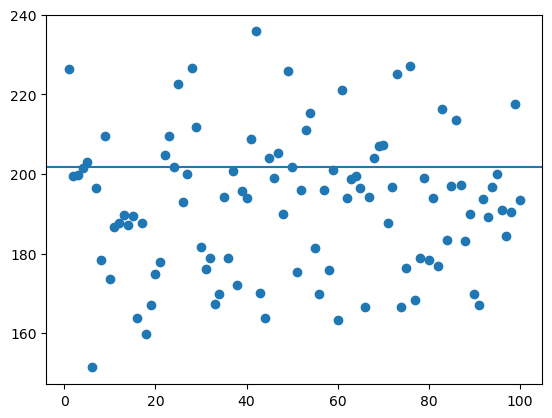

In [96]:
first = wnba[wnba['MIN'] <= 347.333]
second = wnba[(wnba['MIN'] > 347.333) & (wnba['MIN'] <= 682.667)]
third = wnba[wnba['MIN'] > 682.667]

sample_means = []
for i in range(100):
    sample1 = first.sample(4, random_state=i)
    sample2 = second.sample(5, random_state=i)
    sample3 = third.sample(3, random_state=i)
    sample = pd.concat([sample1, sample2, sample3])
    mean_sample = sample['PTS'].mean()
    sample_means.append(mean_sample)


plt.scatter(x=np.linspace(1, 100, 100), y=sample_means)
plt.axhline(y=wnba['PTS'].mean())
plt.show()

## Cluster Sampling

The dataset we've been working with was scraped from the [WNBA's website](http://www.wnba.com/stats/player-stats/#?Season=2017&SeasonType=Regular%20Season&PerMode=Totals). The website centralizes data on basketball games and players in the WNBA. Let's suppose for a moment that such a site didn't exist, and the data were instead scattered across each individual team's website. There are twelve unique teams in our data set, which means we'd have to scrape twelve different websites, each of which requires its own scraping script.

This scenario is quite common in the data science workflow: you want to answer some questions about a population, but the data is scattered in such a way that data collection is either time-consuming or close to impossible. For instance, let's say you want to analyze how people review and rate movies as a function of movie budget. There are many websites that can help with data collection, but how can you go about it so that you can spend a day or two on getting the data you need, rather than a month or two?

One way is to list all the data sources you can find, and then randomly pick only a few of them from which to collect. Then you can individually sample each of the sources you've randomly picked. We call this sampling method cluster sampling, and we call each of the individual data sources a cluster.

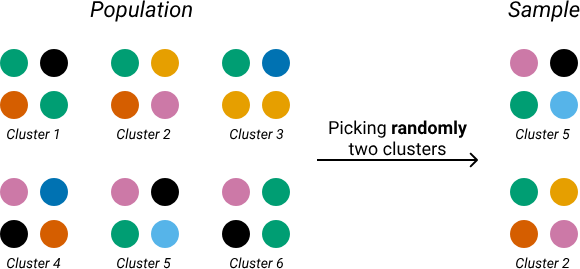

In our case, we'd first list all the possible data sources. Assuming that all the teams in our dataset have a website from which we can take data, we end up with this list of clusters (each team's website is a cluster) :

In [97]:
print(wnba['Team'].unique())

['DAL' 'LA' 'CON' 'SAN' 'MIN' 'SEA' 'PHO' 'CHI' 'WAS' 'NY' 'ATL' 'IND']


Then we need to find a way to randomly pick a few clusters from our listing. There are many ways to do that, but the important thing to keep in mind is that we should avoid picking a cluster twice. Here's one way to sample four clusters randomly:

In [98]:
print(pd.Series(wnba['Team'].unique()).sample(4, random_state = 0))

6     PHO
11    IND
4     MIN
10    ATL
dtype: object


Once we pick the clusters, we move to collecting the data. We can collect all the data from each cluster, but we can also perform sampling on each. It's actually possible to use different sampling methods for different clusters. For instance, we can use stratified sampling on the first two clusters, and simple random sampling on the other two.

Let's simulate a cluster sampling on our data set.

In [99]:
values = pd.Series(wnba['Team'].unique()).sample(4, random_state=0).values
values

teams = []
for val in values:
    team = wnba[wnba['Team'] == val]
    teams.append(team)
    
data = pd.concat(teams)

mean_height = data['Height'].mean()
mean_age = data['Age'].mean()
mean_BMI = data['BMI'].mean()
mean_pts = data['PTS'].mean()


sampling_error_height = wnba['Height'].mean() - mean_height
sampling_error_age = wnba['Age'].mean() - mean_age
sampling_error_BMI = wnba['BMI'].mean() - mean_BMI
sampling_error_points = wnba['PTS'].mean() - mean_pts

## Sampling in Data Science Practice

So far, we've explored a few scenarios where sampling can be useful. There are more situations, however, when a data scientist can use sampling. Let's explore a few.

Let's say you work for an e-commerce company that has a table in a database with more than 10 million rows of online transactions. The marketing team asks you to analyze the data and find categories of customers with a low buying rate, so that they can target their marketing campaigns at the right people. Instead of working with more than 10 million rows at each step of your analysis, you can save a lot of code running time by sampling several hundred rows and performing your analysis on the sample. You can do a simple random sampling, but if you're interested in some categories beforehand, it might be a good idea to use stratified sampling.

Let's consider a different situation. Perhaps you need to collect data from an API that either has a usage limit or isn't free. In this case, you are more or less forced to sample. Knowing how and what to sample can be highly useful.

Another common sampling use case is when the data is scattered across different locations (different websites, different databases, different companies, etc.). As we discussed on the previous screen, cluster sampling would be a great choice in such a scenario.

Sampling is a big topic in statistics, and there are more sampling methods than we've discussed so far. [Here's](https://en.wikipedia.org/wiki/Sampling_(statistics)#Sampling_methods) a good starting point to read about other potentially useful sampling methods.

## Descriptive and Inferential Statistics

Practical statistical analysis revolves entirely around the distinction between a population and a sample. When we're doing statistics in practice, our goal is either to describe a sample or a population or to use a sample to draw conclusions about the population to which it belongs (or a mix of these two goals).

When we describe a sample or a population (by measuring averages, proportions, and other metrics; by visualizing properties of the data through graphs; etc.), we do descriptive statistics.

When we try to use a sample to draw conclusions about a population, we do inferential statistics (we infer information from the sample about the population).

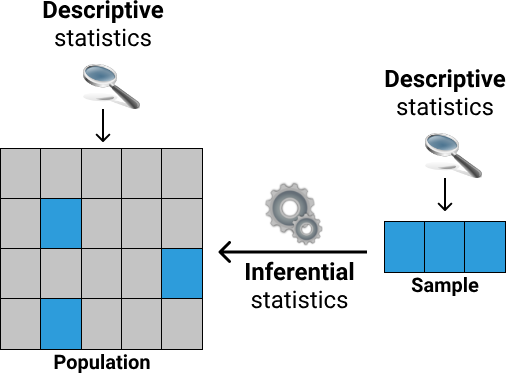

## Next Steps

Throughout this lesson, we discussed the details of collecting data for our analysis, and we completed the first part of the workflow we'll cover in this course.

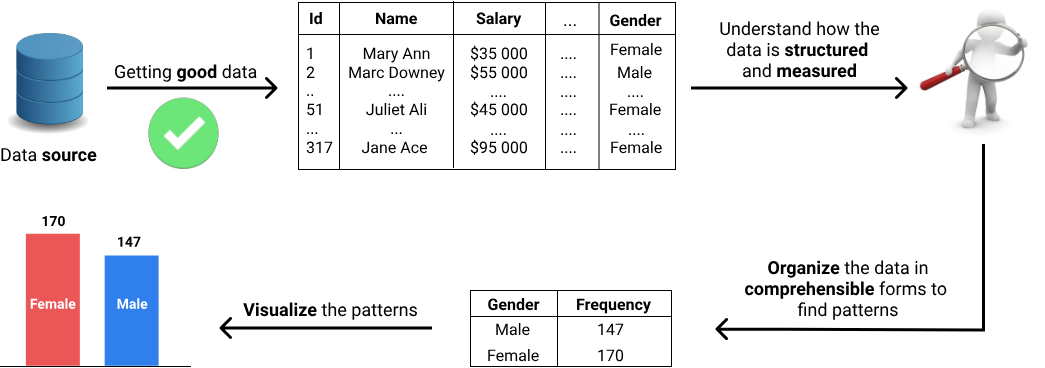

Next in our statistics journey, we'll learn about variables in statistics, how datasets are structured as collections of variables, and how each variable is measured.